In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
from os.path import isdir, join
import librosa

# Any results you write to the current directory are saved as output.

['train', 'sample_submission.csv']


In [2]:
audio_path = "../input/train/audio"
print(os.listdir(audio_path))

['no', 'seven', 'right', 'up', 'down', 'eight', 'six', 'wow', 'bird', 'tree', 'happy', 'three', 'five', 'zero', 'go', 'left', 'nine', 'two', 'four', 'yes', 'bed', 'stop', '_background_noise_', 'cat', 'dog', 'marvin', 'off', 'one', 'on', 'sheila', 'house']


In [3]:
# all audio dirs
dirs = [f for f in os.listdir(audio_path) if os.path.isdir(join(audio_path, f))]
dirs.sort()

In [4]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(mfcc, x_axis='time')
# plt.colorbar()
# plt.title('MFCC')
# plt.tight_layout()

In [5]:
import librosa.display

In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 4))
# librosa.display.specshow(mfcc, x_axis='time')
# plt.colorbar()
# plt.title('MFCC')
# plt.tight_layout()

In [6]:
import os
import librosa
import numpy as np
class AudioFeatureDataset():
    def __init__(self,file_path):
        self.file_path = file_path
        self.labels = os.listdir(self.file_path)
        self.target_labels = ['no', 'seven', 'right', 'up', 'down', 'eight', 'six', 'wow', 'bird', 'tree', 'happy', 'three', 'five', 'zero', 'go', 'left', 'nine', 'two', 'four', 'yes', 'bed', 'stop', 'cat', 'dog', 'marvin', 'off', 'one', 'on', 'sheila', 'house']
        self.data_dict = {}
        for tl in self.target_labels:
            files_dir = os.path.join(file_path,tl)
            all_audio_fp_s =[ os.path.join(files_dir,f) for f in os.listdir(files_dir)]
            self.data_dict[tl] = all_audio_fp_s
    
    def process(self,file,max_pad = 35):
        samps,sr = librosa.load(file, mono=True, sr=None)
        mfcc = librosa.feature.mfcc(samps, sr = sr)
        pad_width = max_pad - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        return mfcc
    def get_dataset(self):
        labels =  []
        features = []
        for t in self.target_labels:
            for fp in self.data_dict[t]:
                labels.append(t)
                features.append(self.process(fp))
        return labels, features

In [7]:
a = AudioFeatureDataset(audio_path)

In [24]:
Y,x = a.get_dataset()

In [25]:
x = np.array(x)
Y = np.array(Y)

In [26]:
from sklearn.model_selection import train_test_split

def get_train_test(split_ratio=0.6, random_state=42):
    return train_test_split(librosa.util.normalize(x), Y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)

In [27]:
X_train, X_test, y_train, y_test = get_train_test()

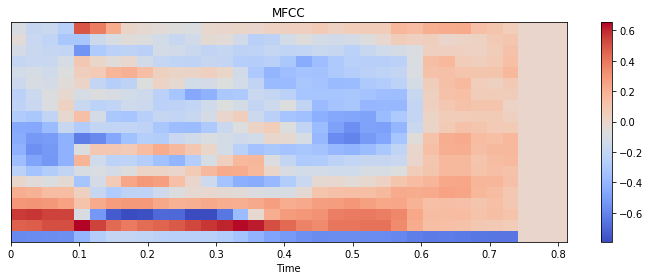

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(X_train[3], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [29]:
from keras.utils.np_utils import to_categorical

In [30]:

X_train = X_train.reshape(X_train.shape[0], 20, 35, 1)

In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [32]:
labelencoder.fit_transform(y_test)

array([ 3, 14, 25, ..., 25, 21,  6])

In [33]:
mapping = dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))

In [34]:
mapping

{'bed': 0,
 'bird': 1,
 'cat': 2,
 'dog': 3,
 'down': 4,
 'eight': 5,
 'five': 6,
 'four': 7,
 'go': 8,
 'happy': 9,
 'house': 10,
 'left': 11,
 'marvin': 12,
 'nine': 13,
 'no': 14,
 'off': 15,
 'on': 16,
 'one': 17,
 'right': 18,
 'seven': 19,
 'sheila': 20,
 'six': 21,
 'stop': 22,
 'three': 23,
 'tree': 24,
 'two': 25,
 'up': 26,
 'wow': 27,
 'yes': 28,
 'zero': 29}

In [35]:
y_test = labelencoder.fit_transform(y_test)
mapping = dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))

In [36]:
mapping

{'bed': 0,
 'bird': 1,
 'cat': 2,
 'dog': 3,
 'down': 4,
 'eight': 5,
 'five': 6,
 'four': 7,
 'go': 8,
 'happy': 9,
 'house': 10,
 'left': 11,
 'marvin': 12,
 'nine': 13,
 'no': 14,
 'off': 15,
 'on': 16,
 'one': 17,
 'right': 18,
 'seven': 19,
 'sheila': 20,
 'six': 21,
 'stop': 22,
 'three': 23,
 'tree': 24,
 'two': 25,
 'up': 26,
 'wow': 27,
 'yes': 28,
 'zero': 29}

In [37]:
y_test

array([ 3, 14, 25, ..., 25, 21,  6])

In [38]:
y_train = labelencoder.fit_transform(y_train)
mapping = dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))

In [ ]:
mapping

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [40]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [41]:
X_test.shape

(25889, 20, 35)

In [42]:

X_test = X_test.reshape(X_test.shape[0], 20, 35, 1)

In [43]:
X_test.shape

(25889, 20, 35, 1)

In [44]:
from optimizers.AdamW import AdamW

In [46]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(20, 8), activation='relu', input_shape=(20, 35, 1)))
model.add(MaxPooling2D(pool_size=(2, 2),dim_ordering="th"))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(10, 4), activation='relu',dim_ordering="th"))
model.add(MaxPooling2D(pool_size=(2, 2),dim_ordering="th"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(30, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),metrics=['accuracy'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(10, 4), activation="relu", data_format="channels_first")`
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  


In [49]:
model.fit(X_train[1000:], y_train[1000:], batch_size=100, epochs=50, verbose=1, validation_data=(X_test, y_test))

Train on 37832 samples, validate on 25889 samples
Epoch 1/50
37832/37832 [==============================] - 18s 483us/step - loss: 1.3368 - acc: 0.5922 - val_loss: 0.8635 - val_acc: 0.7608
Epoch 2/50
37832/37832 [==============================] - 18s 478us/step - loss: 0.9520 - acc: 0.7133 - val_loss: 0.7140 - val_acc: 0.8023
Epoch 3/50
37832/37832 [==============================] - 18s 481us/step - loss: 0.7901 - acc: 0.7615 - val_loss: 0.6204 - val_acc: 0.8286
Epoch 4/50
37832/37832 [==============================] - 18s 480us/step - loss: 0.7033 - acc: 0.7836 - val_loss: 0.5740 - val_acc: 0.8423
Epoch 5/50
37832/37832 [==============================] - 18s 483us/step - loss: 0.6438 - acc: 0.8045 - val_loss: 0.5437 - val_acc: 0.8510
Epoch 6/50
37832/37832 [==============================] - 18s 480us/step - loss: 0.6061 - acc: 0.8148 - val_loss: 0.5074 - val_acc: 0.8579
Epoch 7/50
37832/37832 [==============================] - 18s 481us/step - loss: 0.5771 - acc: 0.8235 - val_loss: 0.

In [51]:
%%time
count = 0
for i in range(1000):    
    tesval = np.array([X_train[i]]).reshape(1,20,35,1)
    if np.argmax(model.predict(tesval)) ==  np.argmax(y_train[i]):
        count+= 1
print(count)

903
CPU times: user 2.29 s, sys: 980 ms, total: 3.27 s
Wall time: 1.84 s


In [52]:
tesval.shape

(1, 20, 35, 1)

In [53]:
np.argmax(model.predict(tesval))

6

In [56]:
tesval.shape

(1, 20, 35, 1)

In [60]:
model.save_weights('result.h5')

['input', 'config', 'working', 'lib']